In [47]:
# Example of the comparison of two data cubes using the astroHOG 
# 
# Prepared by Juan D. Soler (juandiegosoler@gmail.com)

import sys
sys.path.append('../')
from astrohog2d import *
from astrohog2d1v import *

import matplotlib.pyplot as plt
from astropy.io import fits

from scipy import ndimage

In [3]:
# Load the cubes that you plan to compare
# Just for reference, I assume that the first index runs over the non-spatial coordinate
# Also assume that the cubes are spatially aligned and are reprojected into the same grid 

hdul = fits.open('../data/testcube1.fits')
cube1=hdul[0].data
hdul.close()
hdul = fits.open('../data/testcube2.fits')
cube2=hdul[0].data
hdul.close()

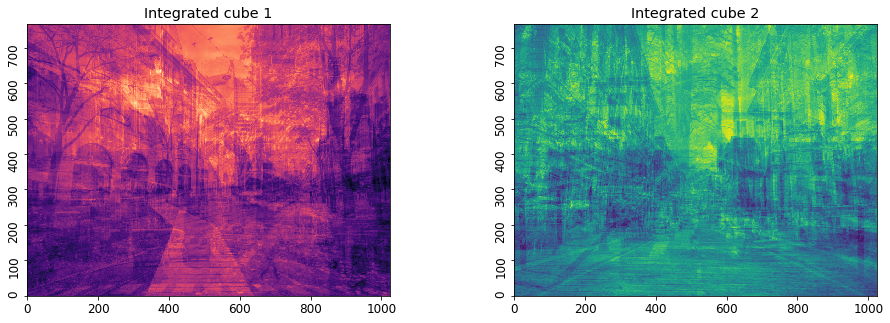

In [25]:
fig, ax = plt.subplots(1,2, figsize=(16., 5.))
plt.rc('font', size=12)
ax[0].imshow(cube1.sum(axis=0), origin='lower', cmap='magma', interpolation='none')
ax[0].set_title('Integrated cube 1')
ax[0].tick_params(axis='y',labelrotation=90)
ax[1].imshow(cube2.sum(axis=0), origin='lower', cmap='viridis', interpolation='none')
ax[1].set_title('Integrated cube 2')
ax[1].tick_params(axis='y',labelrotation=90)
plt.show()

In [7]:
# Here you select the size of your derivative kernel in pixels
ksz=10

In [8]:
# Here I define the masks for both cubes
# For the sake of simplicity, I'm only masking the edges of the cubes
sz1=np.shape(cube1)
mask1=1.+0.*cube1
mask1[:,0:ksz,:]=0.
mask1[:,sz1[1]-1-ksz:sz1[1]-1,:]=0.
mask1[:,:,0:ksz]=0.
mask1[:,:,sz1[2]-1-ksz:sz1[2]-1]=0.
sz2=np.shape(cube2)
mask2=1.+0.*cube2
mask2[:,0:ksz,:]=0.
mask2[:,sz2[1]-1-ksz:sz2[1]-1,:]=0.
mask2[:,:,0:ksz]=0.
mask2[:,:,sz2[2]-1-ksz:sz2[2]-1]=0.

In [9]:
# Here you define the channel ranges over which you want to compare the cubes
zmin1=0
zmax1=sz1[0]-1
zmin2=0
zmax2=sz2[0]-1

In [10]:
# Statistical weights to account for the number of independent gradient pairs within a kernel
weights=(1./ksz)**2

In [11]:
# Run the HOG
circstats, corrcube, scube1, scube2 = HOGcorr_ppvcubes(cube1, cube2, zmin1, zmax1, zmin2, zmax2, ksz=ksz, mask1=mask1, mask2=mask2, weights=weights)

  0%|          | 0/25 [00:00<?, ?it/s]

Computing HOG correlation
6 6
Channel 0/5 and 0/5
Montecarlo iterations disabled =============================


  4%|▍         | 1/25 [00:00<00:09,  2.61it/s]

Channel 0/5 and 1/5
Montecarlo iterations disabled =============================


  8%|▊         | 2/25 [00:00<00:08,  2.72it/s]

Channel 0/5 and 2/5
Montecarlo iterations disabled =============================


 12%|█▏        | 3/25 [00:01<00:07,  2.81it/s]

Channel 0/5 and 3/5
Montecarlo iterations disabled =============================


 16%|█▌        | 4/25 [00:01<00:07,  2.87it/s]

Channel 0/5 and 4/5
Montecarlo iterations disabled =============================


 20%|██        | 5/25 [00:01<00:06,  2.92it/s]

Channel 0/5 and 5/5
Montecarlo iterations disabled =============================


 24%|██▍       | 6/25 [00:02<00:06,  2.93it/s]

Channel 1/5 and 0/5
Montecarlo iterations disabled =============================


 28%|██▊       | 7/25 [00:02<00:06,  2.94it/s]

Channel 1/5 and 1/5
Montecarlo iterations disabled =============================


 32%|███▏      | 8/25 [00:02<00:05,  2.93it/s]

Channel 1/5 and 2/5
Montecarlo iterations disabled =============================


 36%|███▌      | 9/25 [00:03<00:05,  2.94it/s]

Channel 1/5 and 3/5
Montecarlo iterations disabled =============================


 40%|████      | 10/25 [00:03<00:05,  2.95it/s]

Channel 1/5 and 4/5
Montecarlo iterations disabled =============================


 44%|████▍     | 11/25 [00:03<00:04,  2.98it/s]

Channel 1/5 and 5/5
Montecarlo iterations disabled =============================


 48%|████▊     | 12/25 [00:04<00:04,  3.00it/s]

Channel 2/5 and 0/5
Montecarlo iterations disabled =============================


 52%|█████▏    | 13/25 [00:04<00:03,  3.01it/s]

Channel 2/5 and 1/5
Montecarlo iterations disabled =============================


 56%|█████▌    | 14/25 [00:04<00:03,  2.99it/s]

Channel 2/5 and 2/5
Montecarlo iterations disabled =============================


 60%|██████    | 15/25 [00:05<00:03,  3.04it/s]

Channel 2/5 and 3/5
Montecarlo iterations disabled =============================


 64%|██████▍   | 16/25 [00:05<00:02,  3.03it/s]

Channel 2/5 and 4/5
Montecarlo iterations disabled =============================


 68%|██████▊   | 17/25 [00:05<00:02,  3.05it/s]

Channel 2/5 and 5/5
Montecarlo iterations disabled =============================


 72%|███████▏  | 18/25 [00:06<00:02,  3.06it/s]

Channel 3/5 and 0/5
Montecarlo iterations disabled =============================


 76%|███████▌  | 19/25 [00:06<00:01,  3.05it/s]

Channel 3/5 and 1/5
Montecarlo iterations disabled =============================


 80%|████████  | 20/25 [00:06<00:01,  3.03it/s]

Channel 3/5 and 2/5
Montecarlo iterations disabled =============================


 84%|████████▍ | 21/25 [00:07<00:01,  2.97it/s]

Channel 3/5 and 3/5
Montecarlo iterations disabled =============================


 88%|████████▊ | 22/25 [00:07<00:01,  2.97it/s]

Channel 3/5 and 4/5
Montecarlo iterations disabled =============================


 92%|█████████▏| 23/25 [00:07<00:00,  3.01it/s]

Channel 3/5 and 5/5
Montecarlo iterations disabled =============================


 96%|█████████▌| 24/25 [00:08<00:00,  3.02it/s]

Channel 4/5 and 0/5
Montecarlo iterations disabled =============================


100%|██████████| 25/25 [00:08<00:00,  3.02it/s]

Channel 4/5 and 1/5
Montecarlo iterations disabled =============================


26it [00:08,  2.98it/s]                        

Channel 4/5 and 2/5
Montecarlo iterations disabled =============================


27it [00:09,  2.99it/s]

Channel 4/5 and 3/5
Montecarlo iterations disabled =============================


28it [00:09,  3.00it/s]

Channel 4/5 and 4/5
Montecarlo iterations disabled =============================


29it [00:09,  3.02it/s]

Channel 4/5 and 5/5
Montecarlo iterations disabled =============================


30it [00:10,  3.02it/s]

Channel 5/5 and 0/5
Montecarlo iterations disabled =============================


31it [00:10,  3.05it/s]

Channel 5/5 and 1/5
Montecarlo iterations disabled =============================


32it [00:10,  3.05it/s]

Channel 5/5 and 2/5
Montecarlo iterations disabled =============================


33it [00:11,  3.07it/s]

Channel 5/5 and 3/5
Montecarlo iterations disabled =============================


34it [00:11,  3.08it/s]

Channel 5/5 and 4/5
Montecarlo iterations disabled =============================


35it [00:11,  3.11it/s]

Channel 5/5 and 5/5
Montecarlo iterations disabled =============================


36it [00:11,  3.00it/s]


In [12]:
# The outputs are: 
# 1. 'corrplane' an array with all of the metrics to evaluate the correlation between the cubes
np.shape(circstats['V'])

(6, 6)

In [13]:
# 2. 'corrcube', which is the array containing all the relative orientation angles between gradients
np.shape(corrcube)

(6, 6, 768, 1024)

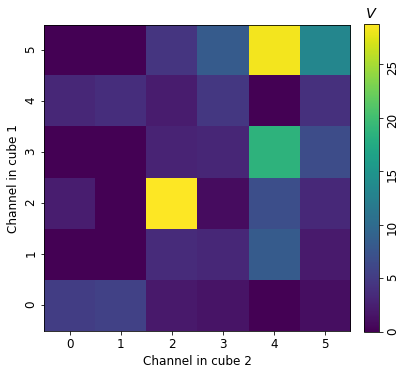

In [46]:
# Here for example, we show the projected Rayleight statistic (V)
# Large V values indicate that the angle distribution is not flat and is centred on zero
# V values around zero correspond to a flat angle distribution.

fig, ax = plt.subplots(1,1, figsize=(6., 6.))
plt.rc('font', size=12)
im=ax.imshow(circstats['V'], origin='lower',clim=[0.,np.nanmax(circstats['V'])], interpolation='None')
ax.set_xlabel('Channel in cube 2')
ax.set_ylabel('Channel in cube 1')
ax.tick_params(axis='y',labelrotation=90)
cbl=plt.colorbar(im, fraction=0.046, pad=0.04)
cbl.ax.set_title(r'$V$')
cbl.ax.tick_params(axis='y',labelrotation=90)
plt.show()

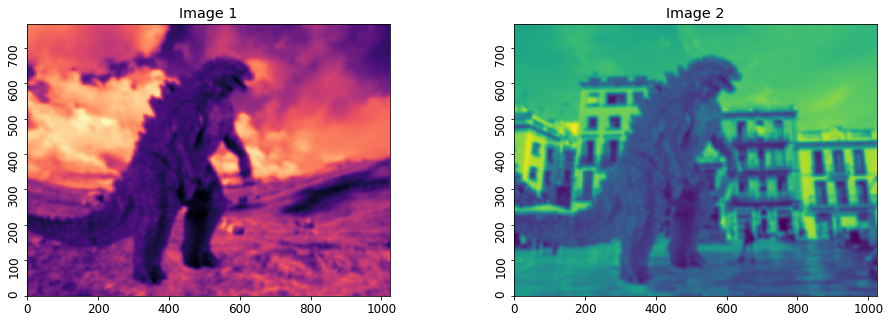

In [24]:
# Plot the pair of channels with the highest spatial correlations
#
#
vplane=circstats['V']
indmax1, indmax2 =(vplane == np.nanmax(vplane)).nonzero()

fig, ax = plt.subplots(1,2, figsize=(16., 5.))
ax[0].imshow(scube1[indmax1[0],:,:], origin='lower', cmap='magma', interpolation='none')
ax[0].set_title('Image 1')
ax[0].tick_params(axis='y',labelrotation=90)
ax[1].imshow(scube2[indmax2[0],:,:], origin='lower', cmap='viridis', interpolation='none')
ax[1].set_title('Image 2')
ax[1].tick_params(axis='y',labelrotation=90)
plt.show()


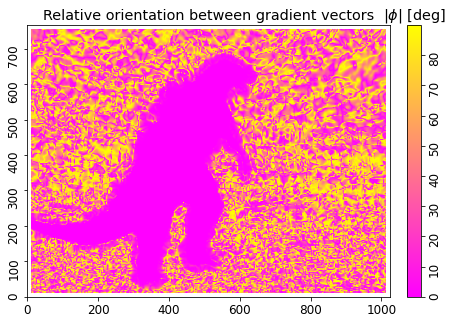

In [43]:
# Plot the relative orientation angle between the gradients in the two images with the highest correlation
#
#
fig, ax = plt.subplots(1,1, figsize=(8., 5.))
im=ax.imshow(np.abs(corrcube[indmax1[0],indmax2[0],:,:])*180.0/np.pi, origin='lower', cmap='spring',interpolation='None')
ax.tick_params(axis='y',labelrotation=90)
cbl=plt.colorbar(im,fraction=0.046, pad=0.04)
cbl.ax.set_title(r'$|\phi|$ [deg]')
cbl.ax.tick_params(axis='y',labelrotation=90)
ax.set_title('Relative orientation between gradient vectors')
plt.show()

In [32]:
# Making block average with block size matching the kernel size
sz=np.shape(cube1)
nby=6
nbx=int(np.ceil(nby*sz[1]/sz[2]))
vblocks=imablockaverage(corrcube[indmax1[0],indmax2[0],:,:], nbx=nbx, nby=nby, weight=(1./ksz)**2)

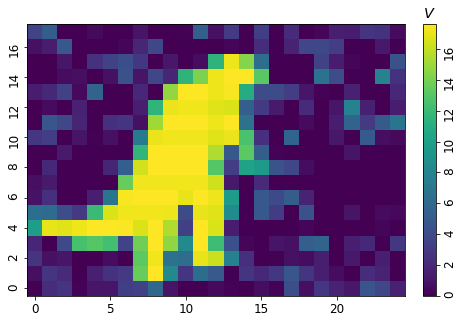

In [42]:
fig, ax = plt.subplots(1,1, figsize=(8., 5.))
im=ax.imshow(vblocks, origin='lower', vmin=0., interpolation='none')
ax.tick_params(axis='y',labelrotation=90)
cbl=plt.colorbar(im,fraction=0.046, pad=0.04)
cbl.ax.set_title(r'$V$')
cbl.ax.tick_params(axis='y',labelrotation=90)
plt.show()

In [34]:
# Making block average with block size matching the kernel size
nby=int(0.25*sz[2]/ksz)
nbx=int(nby*sz[1]/sz[2])
vblocks=imablockaverage(corrcube[indmax1[0],indmax2[0],:,:], nbx=nbx, nby=nby, weight=(1./ksz)**2)

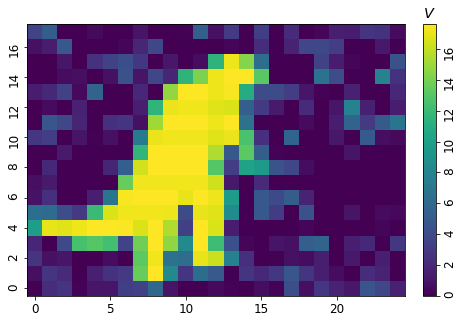

In [40]:
fig, ax = plt.subplots(1,1, figsize=(8., 5.))
im=ax.imshow(vblocks, origin='lower', vmin=0., interpolation='none')
ax.tick_params(axis='y',labelrotation=90)
cbl=plt.colorbar(im,fraction=0.046, pad=0.04)
cbl.ax.set_title(r'$V$')
cbl.ax.tick_params(axis='y',labelrotation=90)
plt.show()